In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Парето

>Сгенерируйте из него выборку объёма 1000

In [162]:
b = 2.62
pareto_rv = sts.pareto(b)
sample = sts.pareto.rvs(b, scale=0.8, size=1000)

>постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

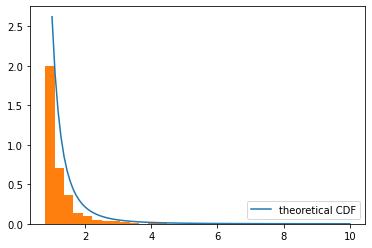

In [181]:
x = np.linspace(1, 10, 100)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='theoretical CDF')


# я хз что такое normed, вот тут 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# такого параметра нет, юзаем density 
plt.hist(sample, bins=30, density=True)
plt.legend(loc='lower right')

> Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Согласно ЦПТ параметры распределения выборочного среднего будут $ N(n \mu, n \sigma^2) $

In [206]:
mean, var = sts.pareto.stats(b)
print(mean, var)

1.6172839506172838 1.6101990746886534


> при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

> Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения 

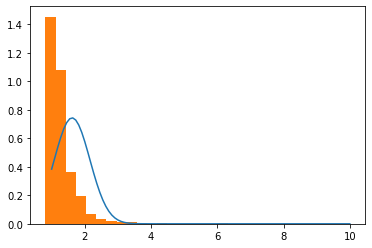

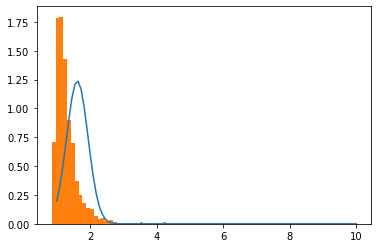

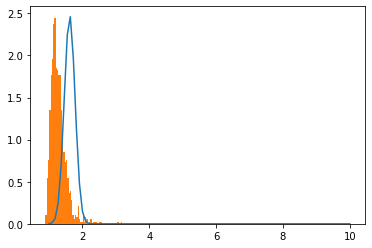

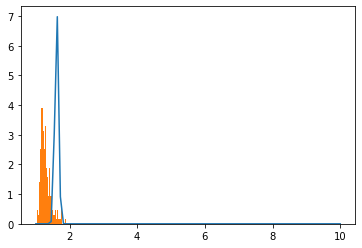

In [207]:
samples = []
for n in (3, 5, 10, 30):
    sample_n = []
    for i in range(1, 1001):
        n_variates = sts.pareto.rvs(b, scale=0.8, size=n)
        sample_n.append(n_variates.mean())
    samples.append(sample_n)
    norm_rv = sts.norm(mean, var/n)
    pdf_norm = norm_rv.pdf(x)
    plt.figure()    
    plt.plot(x, pdf_norm, label='Norm distribution of ' + str(n))
    plt.hist(sample_n, bins=n*6, density=True)

>Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Как было предсказано, распределение приближается к нормальному; 
Не могу нормально объяснить, что началось после 10 - пик нормального графика поехал высоко от гистограммы, 
вероятно, требуется аккуратный подбор колиества корзин